## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [98]:
# you code here

##### 线性回归模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
random_data = np.random.random((20, 2))

In [3]:
random_data

array([[0.78280957, 0.07466719],
       [0.71750364, 0.2078811 ],
       [0.00391408, 0.2956553 ],
       [0.33808434, 0.47555478],
       [0.1066215 , 0.24377968],
       [0.28747602, 0.57326931],
       [0.65931265, 0.58455143],
       [0.42263611, 0.50181252],
       [0.3404695 , 0.86116225],
       [0.03904261, 0.44804983],
       [0.52753796, 0.37570323],
       [0.56399506, 0.09259604],
       [0.39716718, 0.04243816],
       [0.81885824, 0.53791812],
       [0.74537757, 0.26632304],
       [0.66248671, 0.42028029],
       [0.35535721, 0.27543171],
       [0.49126319, 0.67979096],
       [0.37997759, 0.76128546],
       [0.0115467 , 0.84858114]])

In [4]:
X = random_data[:, 0]

In [5]:
X.shape
X = X.reshape(-1, 1)
X.shape

(20,)

(20, 1)

In [6]:
Y = random_data[:, 1]

In [7]:
def assmuing_function(x):
    return 13.4 * x + 5 + np.random.randint(-5, 5)

In [8]:
y = [assmuing_function(x) for x in X]

In [9]:
y

[array([16.48964826]),
 array([9.61454876]),
 array([8.05244873]),
 array([11.53033018]),
 array([7.4287281]),
 array([4.85217864]),
 array([10.83478953]),
 array([10.66332393]),
 array([4.56229136]),
 array([0.52317101]),
 array([12.06900868]),
 array([7.55753375]),
 array([12.32204016]),
 array([17.97270036]),
 array([16.98805941]),
 array([15.87732192]),
 array([4.76178663]),
 array([12.58292675]),
 array([6.09169977]),
 array([5.15472579])]

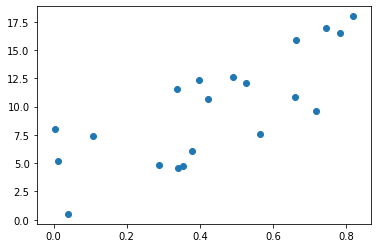

In [10]:
plt.scatter(X,y)

In [11]:
reg = LinearRegression().fit(X, y)

In [12]:
reg.score(X,y)

0.5951360843984911

In [13]:
reg.coef_

array([[14.38617559]])

In [14]:
reg.intercept_

array([3.57340818])

In [15]:
def f(x):
    return reg.coef_ * x  + reg.intercept_

##### 可视化

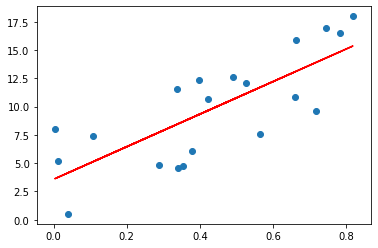

In [16]:
plt.scatter(X, y)
plt.plot(X, f(X), color = 'red')

##### predict new data

In [17]:
test_data =  np.random.random((5, 2))

In [18]:
test_data_x = test_data[:, 0]
test_data_y = assmuing_function(test_data_x)

In [19]:
test_predict = reg.predict(test_data_x.reshape(-1, 1))

In [20]:
test_predict

array([[ 5.46404194],
       [13.04891886],
       [15.68098184],
       [ 4.12232325],
       [ 9.38727943]])

##### 模型评价

In [21]:
print('coefficients :\n', reg.coef_)

coefficients :
 [[14.38617559]]


In [22]:
print("mean square error: %.2f"
     % mean_squared_error(test_data_y, test_predict))

mean square error: 15.95


In [23]:
print('variance score: %.2f' % r2_score(test_data_y, test_predict))

variance score: 0.04


##### 可视化

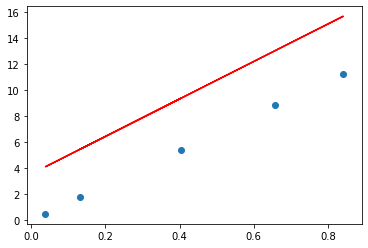

In [24]:
plt.scatter(test_data_x, test_data_y)
plt.plot(test_data_x, test_predict, color = 'red')
plt.show()

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [25]:
# you code here

##### KNN模型（以鸢尾花数据为例）

In [26]:
from sklearn import datasets
from scipy.spatial.distance import cosine
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib.colors import ListedColormap

In [27]:
iris = datasets.load_iris()

In [28]:
X = iris.data[:, :2]
y = iris.target
X.shape
y.shape

(150, 2)

(150,)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [30]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [31]:
def distance(x1, x2):
    return cosine(x1, x2)

In [32]:
 def predict(x, k = 5):
    X = x_train
    y = y_train
    most_similaries = sorted(model(X, y), key = lambda xi : distance(xi[0], x))[:k]
    most_categories = [x[1] for x in most_similaries] 
    return Counter(most_categories).most_common(1)[0][0]

##### 预测新数据

**单个数据预测**

In [33]:
y_test[1]
predict(x_test[1])

0

0

**用网格法批量预测并可视化**

In [34]:
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

In [35]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

In [36]:
Z = []
i = 0
for x in np.c_[xx.ravel(), yy.ravel()]:
    i = i + 1
    if i % 1000 == 0:
        print(i)
    Z.append(predict(x, k = 5))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000


In [37]:
Z = np.array(Z).reshape(xx.shape)
Z.shape

(160, 240)

##### 预测并可视化

In [38]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<Figure size 432x288 with 0 Axes>

(3.8, 8.580000000000005)

(1.7999999999999998, 4.980000000000002)

Text(0.5, 1.0, '3-Class classification k = 5 of trian data')

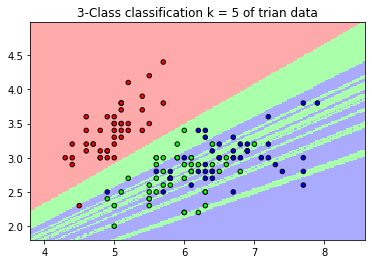

In [39]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = 5 of trian data") 

<Figure size 432x288 with 0 Axes>

(3.8, 8.580000000000005)

(1.7999999999999998, 4.980000000000002)

Text(0.5, 1.0, '3-Class classification k = 5 of test data')

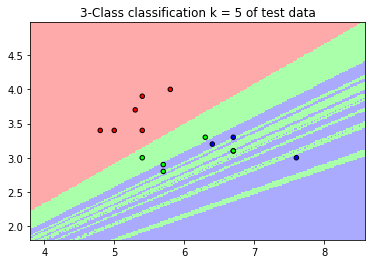

In [40]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = 5 of test data") 

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [41]:
# you code here

##### 实现信息熵

In [42]:
!pip3 install icecream  --user

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
from icecream import ic
import pandas as pd

In [44]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [45]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [46]:
entropy([1, 2, 3, 4])

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

In [47]:
entropy([1, 2, 2, 4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [48]:
entropy([1, 2, 2, 2])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [49]:
entropy([0, 0, 0, 2])

ic| probs: [0.75, 0.25]


0.5623351446188083

##### 特征点选择

In [198]:
mock_data = {
    'gender' :['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income' :['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number' :[1, 1, 2, 1, 1, 1, 2],
    'bought' :[1, 1, 1, 0, 0, 0, 1]
}

In [199]:
dataset = pd.DataFrame.from_dict(mock_data)

In [200]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [201]:
set(mock_data['family_number'])
mock_data['family_number']

{1, 2}

[1, 1, 2, 1, 1, 1, 2]

In [202]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].to_list()

In [203]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].to_list()

In [204]:
sub_split_1
sub_split_2

[1, 1, 0, 0, 0]

[1, 1]

In [205]:
_sub_split_1 = dataset[dataset['gender'] == 'M']['bought'].to_list()

In [206]:
_sub_split_2 = dataset[dataset['gender'] == 'F']['bought'].to_list()

In [207]:
_sub_split_1
_sub_split_2

[0, 0, 1]

[1, 1, 1, 0]

In [208]:
entropy(sub_split_1) + entropy(sub_split_2) 

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [209]:
entropy(_sub_split_1) + entropy(_sub_split_2) 

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

In [210]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

##### 持续的特征点选择

In [213]:
def find_the_min_spliter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    ic(x_fields)
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_split_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            entropy_1 = entropy(sub_split_1)
            ic(entropy_1)
            
            sub_split_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            entropy_2 = entropy(sub_split_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
            
            
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter
    

In [214]:
find_the_min_spliter(dataset, 'bought')

ic| x_fields: {'family_number', 'income', 'gender'}
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083


spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565


('income', '+10')

In [ ]:
dataset[dataset['income'] == '+10']

In [ ]:
dataset[dataset['income'] == '-10']

In [ ]:
find_the_min_spliter(dataset[dataset['income'] == '+10'], 'bought')

In [ ]:
sub_df = dataset[dataset['income'] == "+10"]

In [ ]:
sub_df[sub_df['family_number'] == 1]

In [ ]:
sub_df[sub_df['family_number'] == 2]

In [ ]:
find_the_min_spliter(sub_df[sub_df['family_number'] == 1], 'bought')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

##### KMeans 模型

In [ ]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [ ]:
X = [np.random.randint(0, 100) for _ in range(100)]
Y = [np.random.randint(0, 100) for _ in range(100)]

In [ ]:
plt.scatter(X, Y)

In [ ]:
trainning_data = [[x, y] for x, y in zip(X, Y)]

In [ ]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [ ]:
cluster.fit(trainning_data)

In [ ]:
cluster.cluster_centers_

In [ ]:
cluster.labels_

In [ ]:
centers = defaultdict(list)

In [ ]:
cluster.labels_.shape

In [ ]:
for label, location in zip(cluster.labels_, trainning_data):
    centers[label].append(location)

##### 可视化

In [ ]:
color  = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c = color[i])

for centers in cluster.cluster_centers_:
    plt.scatter(*centers, s = 100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

**what is model?**：
模型是用来描述客观世界的数学模型，是从数据中抽象出来的，在进行数据分析的时候，我们通常手上只有数据，然后根据数据找规律，找到的规律就是模型。

**why all the models are wrong, but some are useful?**: 前半句的意思是影响现实的因素非常多，人类不可能站在“上帝视角”对现实世界进行完全模拟，因此我们得到模型也就不是绝对意义上的正确的模型, 是有误差的。后半句的意思是，模型虽然不能对现实进行完全的模拟，但是可以帮助我们找到一些有规律的东西，从而利用这个规律解决现实问题。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

**What's the underfitting and overfitting?**:  
**欠拟合**: 就是模型没有很好的捕捉到数据特征，不能很好的拟合数据.  
**欠拟合的原因**：模型复杂度过低，训练迭代的次数不够，不能很好的拟合所有的数据，训练误差大；  
**避免欠拟合**：  
1, 增加模型复杂度，如采用高阶模型（预测）,添加多项式特征  
2, 引入更多特征（分类）等.  
3, 减少正则化参数  
**过拟合** :模型对你数据过度拟合，以至于把噪声数据也学习到了，这样就导致在后期测试的时候不能很好的识别数据，即不能正确的分类，模型的泛化能力太差。  
**过拟合的原因**:   
1, 建模样本抽取错误  
2， 样本里的噪音数据干扰过大  
3， 参数太多， 模型复杂度高  
**过拟合的原因**：模型复杂度过高，训练数据过少，训练误差小，测试误差大；  
避免过拟合：降低模型复杂度，如加上正则惩罚项，如L1，L2，增加训练数据等。  
**避免过拟合**:   
1,增加样本的全面性和数据  
２，控制模型的复杂度  
３，不要过度训练  
４，模型融合

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

|   | 1                 |         0        |
|:----:|:-------------------:|:------------------:|
| 1 | True Positive(TP) | False Positive(FP) |
| 0 | False Negative(FN)| True Negative(TN)  |

根据混淆矩阵，　TP为预测正确为正例的数量， FP为预测错误为正例的数量，FN为预测错误为负例的数量，TN为预测正确为负例的数量  
**precision**  
precision为 $TP/(TP + FP)$， 即为预测为正例的样本中，实际真正为正例的比例  
在对精确率敏感的场景比如反欺诈领域，由于模型的结果会对正常客户产生干扰，造成误杀，营销客户体验，因此模型需要在保证精确率的前提下提高召回率。  
**recall**  
$TP/(TP + FN)$， 即为实际真正为正例的样本中，被预测为正例的比例  
在对精确率不敏感但是对召回率敏感的场景，如精准营销中，可以适当调低阈值增加召回率。  
**F1**  
F1值是精确率和召回率的调和均值，即$F1 = 2 * precision * recall / (precision + recall)$，相当于精确率和召回率的综合评价指标  
**F2**  
$F1 = 5 * precision * recall / (4 * precision + recall)$  
**F$\alpha$**  
$F\alpha = (1 + \alpha^2) * precision * recall / (\alpha^2 * precision + recall)$  
**AUC**  
取不同的阈值对正列和反例进行预测可以得到不同的TPR和FPR.以TPR为y轴，以FPR为x轴，做图得到的曲线是ROC曲线，AUC曲线下的面积就是AUC.AUC越接近1，说明模型预测效果越好。  

对于有监督的二分类问题，在正负样本都足够的情况下，可以直接使用ROC评价模型效果，在确定阈值过程中，可以根据Precision,Recall或者F1来评价模型分类效果。  

对于多分类问题，可以对每一类分别计算Precision,Recall和F1，综合作为模型评价指标


#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:传统的分析式编程是基于规则的，为了达到目的，我们会写各种规则对条件进行约束，进而求到结果。这种方式的缺点是在很多场景下，我们很难穷举出所有规则，当出现了不在我们规则范围内的数据时，就会得到错误答案。  
机器学习这种思维方式克服了传统分析式编程的缺点，它能够自动的从数据中学习到规律，从而使程序变得更聪明。当有新数据过来时，机器学习模型可以根据学到的知识，对新数据进行预测，这种方式节省了大量的人力劳动，并且做到了传统方式无法做到的事情。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [179]:
b = np.array([1,2,3,4])
b[[0, 3]]

array([1, 4])

In [174]:
dataset
dataSet = dataset.values
dataSet

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


array([['F', '+10', 1, 1],
       ['F', '-10', 1, 1],
       ['F', '+10', 2, 1],
       ['F', '+10', 1, 0],
       ['M', '+10', 1, 0],
       ['M', '+10', 1, 0],
       ['M', '-10', 2, 1]], dtype=object)

In [180]:
dataSet

array([['F', '+10', 1, 1],
       ['F', '-10', 1, 1],
       ['F', '+10', 2, 1],
       ['F', '+10', 1, 0],
       ['M', '+10', 1, 0],
       ['M', '+10', 1, 0],
       ['M', '-10', 2, 1]], dtype=object)

In [186]:
v = 'M'

In [187]:
[line[-1] for line in dataSet if line[0] == v]

[0, 0, 1]

In [281]:
import operator

In [282]:
def find_the_min_spliter(training_data: np.array):
    training_data = np.array(training_data)
    fields_index = [i for i in range(np.array(training_data).shape[1] - 1)]
    
    spliter = None
    min_entropy = float('inf')
    
    for f in fields_index:
        ic(f)
        values = set(training_data[:, f])
        ic(values)
        for v in values:
            sub_split_1 = [line[-1] for line in dataSet if line[0] == v]
            ic(sub_split_1)
            entropy_1 = entropy(sub_split_1)
            ic(entropy_1)
            
            sub_split_2 =[line[-1] for line in dataSet if line[0] != v]
            ic(sub_split_2)
            entropy_2 = entropy(sub_split_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
            
            
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter
    

In [283]:
find_the_min_spliter(dataSet)

ic| f: 0
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 1
ic| values: {'-10', '+10'}
ic| sub_split_1: []
ic| probs: []
ic| entropy_1: 0
ic| sub_split_2: [1, 1, 1, 0, 0, 0, 1]
ic| probs: [0.42857142857142855, 0.5714285714285714]
ic| entropy_2: 0.6829081047004717
ic| entropy_v: 0.6829081047004717
ic| sub_split_1: []
ic| probs: []
ic| entropy_1: 0
ic| sub_split_2: [1, 1, 1, 0, 0, 0, 1]
ic| probs: [0.42857142857142855, 0.5714285714285714]
ic| entropy_2: 0.6829081047004717
ic| entropy_v: 0.6829081047004717
ic| f: 2
ic| values: {1, 2}
ic| sub_split_

spliter is: (2, 2)
the min entropy is: 0.6829081047004717


(2, 2)

In [305]:
# you code here
def splitDataSet(dataSet, axis, value):
    """
    根据特征和特征对应的值对数据集进行划分
    """
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = list(featVec[:axis])
            reduceFeatVec.extend(list(featVec[axis + 1:]))
            retDataSet.append(reduceFeatVec)
    return retDataSet
    
def majorityCnt(classList):
    """
    如果已经使用了所有的特征但是分类标签任然不唯一的时候，采用投票法进行分类
    """
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
        sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
        return sortedClassCount[0][0]

def buildTree(dataset, labels):
    """
    递归构建决策树
    """
    ic(dataset)
    classList = [example[-1] for example in dataset]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    ic(dataset[0])
    
    if len(dataset[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = find_the_min_spliter(dataset)[0]
    ic(bestFeat)
    bestFeatLabel = labels[bestFeat]
    ic(bestFeatLabel)
    
    
    myTree = {bestFeatLabel:{}}
    
    ic(labels)
    bestFeat = labels.index(bestFeatLabel)
    ic(bestFeat)
    del(labels[bestFeat])
    ic(labels)
    
    featValues = [example[bestFeat] for example in dataset]
    ic(featValues)
    
    uniqueVals = set(featValues)
    ic(uniqueVals)
    
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = buildTree(splitDataSet(dataset, bestFeat, value), subLabels)
        
    return myTree

def predictOne(inputTree, featLabels, testVec):
    """
    输入测试数据进行预测
    """
    ic(inputTree)
    firstStr = list(inputTree.keys())[0]
    ic(firstStr)
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = predictOne(secondDict[key], featLabels, testVec)
            else :
                classLabel = secondDict[key]
            return classLabel

def predict(inputTree, featLabels, testDataSet):
    predictLabels = []
    for testVec in testDataSet:
        predictLabels.append(predictOne(inputTree, featLabels, testVec))
    return predictLabels
    


In [306]:
dataset
labels = dataset.columns[:-1].tolist()
labels_tmp = labels[:]
labels_tmp

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


['gender', 'income', 'family_number']

In [307]:
#把前面dataframe格式的数据集转成数组格式
dataSet = dataset.values
dataSet

array([['F', '+10', 1, 1],
       ['F', '-10', 1, 1],
       ['F', '+10', 2, 1],
       ['F', '+10', 1, 0],
       ['M', '+10', 1, 0],
       ['M', '+10', 1, 0],
       ['M', '-10', 2, 1]], dtype=object)

In [308]:
desicionTree = buildTree(dataSet, labels_tmp)

ic| dataset: array([['F', '+10', 1, 1],
                    ['F', '-10', 1, 1],
                    ['F', '+10', 2, 1],
                    ['F', '+10', 1, 0],
                    ['M', '+10', 1, 0],
                    ['M', '+10', 1, 0],
                    ['M', '-10', 2, 1]], dtype=object)
ic| dataset[0]: array(['F', '+10', 1, 1], dtype=object)
ic| f: 0
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 1
ic| values: {'-10', '+10'}
ic| sub_split_1: []
ic| probs: []
ic| entropy_1: 0
ic| sub_split_2: [1, 1, 1, 0, 0, 0, 1]
ic| probs: [0.428571428

spliter is: (2, 2)
the min entropy is: 0.6829081047004717


| uniqueVals: {1, 2}
ic| dataset: [['F', '+10', 1],
              ['F', '-10', 1],
              ['F', '+10', 0],
              ['M', '+10', 0],
              ['M', '+10', 0]]
ic| dataset[0]: ['F', '+10', 1]
ic| f: 0
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 1
ic| values: {'-10', '+10'}
ic| sub_split_1: []
ic| probs: []
ic| entropy_1: 0
ic| sub_split_2: [1, 1, 1, 0, 0, 0, 1]
ic| probs: [0.42857142857142855, 0.5714285714285714]
ic| entropy_2: 0.6829081047004717
ic| entropy_v: 0.6829081047004717
ic| sub_split_1: []
ic| probs: []
ic| entropy

spliter is: (1, '+10')
the min entropy is: 0.6829081047004717


ic| dataset: [['F', 1], ['F', 0], ['M', 0], ['M', 0]]
ic| dataset[0]: ['F', 1]
ic| f: 0
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| bestFeat: 0
ic| bestFeatLabel: 'gender'
ic| labels: ['gender']
ic| bestFeat: 0
ic| labels: []
ic| featValues: ['F', 'F', 'M', 'M']
ic| uniqueVals: {'F', 'M'}
ic| dataset: [[1], [0]]
ic| dataset[0]: [1]


spliter is: (0, 'M')
the min entropy is: 1.198849312913621


ic| dataset: [[0], [0]]
ic| dataset: [['F', '+10', 1], ['M', '-10', 1]]


In [313]:
predict(desicionTree, labels, [['M','-10', 1]])

ic| inputTree: {'family_number': {1: {'income': {'+10': {'gender': {'F': 1, 'M': 0}},
                                                 '-10': 1}},
                                  2: 1}}
ic| firstStr: 'family_number'
ic| inputTree: {'income': {'+10': {'gender': {'F': 1, 'M': 0}}, '-10': 1}}
ic| firstStr: 'income'


[1]

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [ ]:
# you code here

In [14]:
from sklearn.datasets import load_boston

In [15]:
dataset = load_boston()

In [16]:
dataset['data'].shape

(506, 13)

In [17]:
x, y = dataset['data'], dataset['target']
X_rm = x[:, 5] 
X_rm.shape

(506,)

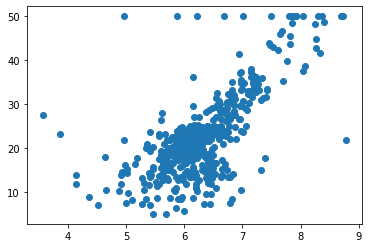

In [18]:
plt.scatter(X_rm, y)

In [22]:
def price(rm, k , b):
    return k * rm + b

##### Loss改为绝对值

In [23]:
def loss(y, y_hat):
    return sum(abs(y_i - y_hat) for y_i, y_hat in zip(list(y), list(y_hat))) / len(list(y))

##### 重新定义偏导数

In [26]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient += -x_i
        else:
            gradient += x_i
    return gradient / n
    
def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient += -1
        else:
            gradient += 1  
    return gradient / n
        

##### 验证loss是否收敛

In [27]:
import random
k = random.random() * 200 - 100
b = random.random() * 200 - 100

learning_rate = 1e-3

iteration_num = 200
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i, current_loss, k, b))
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k - learning_rate * k_gradient
    b = b - learning_rate * b_gradient
    
best_k = k 
best_b = b

Iteration 0, the loss is 377.90462025646025, parameters k is 57.93273652453138 and b is 36.35135846511068
Iteration 1, the loss is 377.8641236270776, parameters k is 57.92645189014403 and b is 36.35035846511068
Iteration 2, the loss is 377.82362699769516, parameters k is 57.92016725575668 and b is 36.34935846511068
Iteration 3, the loss is 377.78313036831247, parameters k is 57.91388262136933 and b is 36.348358465110685
Iteration 4, the loss is 377.7426337389295, parameters k is 57.90759798698198 and b is 36.34735846511069
Iteration 5, the loss is 377.70213710954744, parameters k is 57.901313352594634 and b is 36.34635846511069
Iteration 6, the loss is 377.6616404801646, parameters k is 57.895028718207286 and b is 36.34535846511069
Iteration 7, the loss is 377.6211438507816, parameters k is 57.88874408381994 and b is 36.344358465110695
Iteration 8, the loss is 377.58064722139846, parameters k is 57.88245944943259 and b is 36.3433584651107
Iteration 9, the loss is 377.5401505920161, par

**观察结果发现，无法收敛**

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)